# Preparing the dataset

In [1]:
!pip install pillow

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/AIIIProject

Mounted at /content/drive/
/content/drive/MyDrive/AIIIProject


Import the libraries

In [3]:
import os
import cv2
import numpy as np
import re
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

Remove the masks from the "crops" dataset

In [ ]:
%cd crops

/content/drive/MyDrive/AIIIProject/crops


In [ ]:
files = os.listdir()
print(files)
for img in files:
  match = re.search('.*_.*.png',img)
  if match:
    os.remove(os.path.join(os.getcwd(), img))

Organize the other dataset (we take only the "..._1.png" images since are the ones without the background)

In [ ]:
%cd ..

In [ ]:
%mkdir dataset

In [ ]:
%cd esantema-maculo-papuloso

/content/drive/MyDrive/AIIIProject/esantema-maculo-papuloso


In [ ]:
directories = os.listdir()
i = 0
for d in directories:
  directories2 = os.listdir(d)
  for d2 in directories2:
    if os.path.isdir(d + '/' + d2):
      files = os.listdir(d + '/' + d2)
      for img in files:
        match = re.search('example[0-9]{1,3}_1.png',img)
        if match:
          shutil.move(d + '/' + d2 + '/' + img, '/content/drive/MyDrive/AIIIProject/dataset')


In [ ]:
%cd ..

/content/drive/MyDrive/AIIIProject


In [4]:
%cd dataset

/content/drive/MyDrive/AIIIProject/dataset


Rename the images

In [7]:
for num, img in enumerate(os.listdir()):
  os.rename(img, str(num))



Inspect the dataset

In [13]:
image = Image.open(str(0))
width, height = image.size
heights = []
widths = []
maxWidth = width
minWidth = width
maxHeight = height
minHeight = height
images = os.listdir()
for i in images:
  img = Image.open(str(i))
  width, height = img.size
  widths.append(width)
  heights.append(height)
  if width > maxWidth:
    maxWidth = width
  if width < minWidth:
    minWidth = width
  if height > maxHeight:
    maxHeight = height
  if height < minHeight:
    minHeight = height


# Stampa le dimensioni delle immagini
print(f"Max width = {maxWidth}, min width = {minWidth}")
print(f"max height = {maxHeight}, min height = {minHeight}")

Max width = 2896, min width = 220
max height = 1944, min height = 94


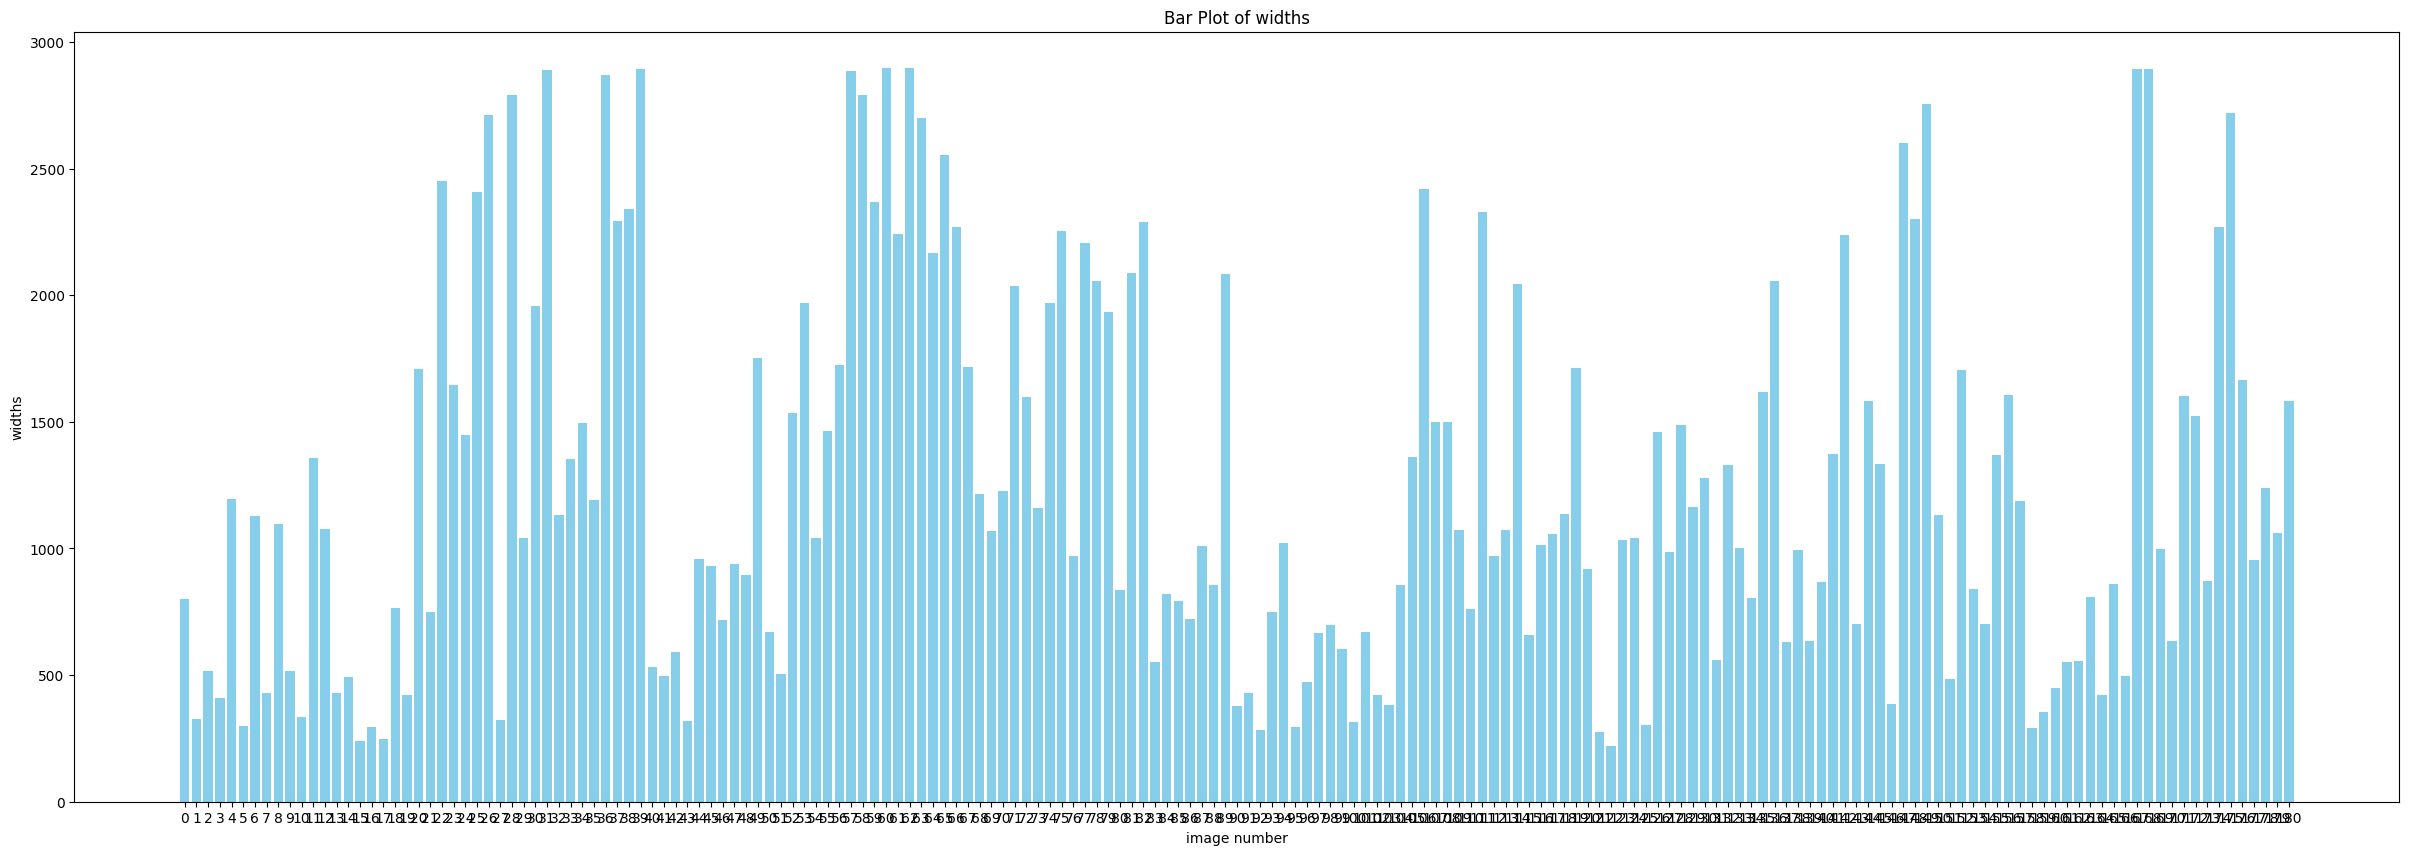

In [14]:
plt.figure(figsize=(30, 10))  # Imposta la dimensione della figura (larghezza, altezza)
plt.bar(images, widths, color='skyblue')
# Aggiungi titoli e label agli assi
plt.xlabel('image number')
plt.ylabel('widths')
plt.title('Bar Plot of widths')

# Mostra il plot
plt.show()

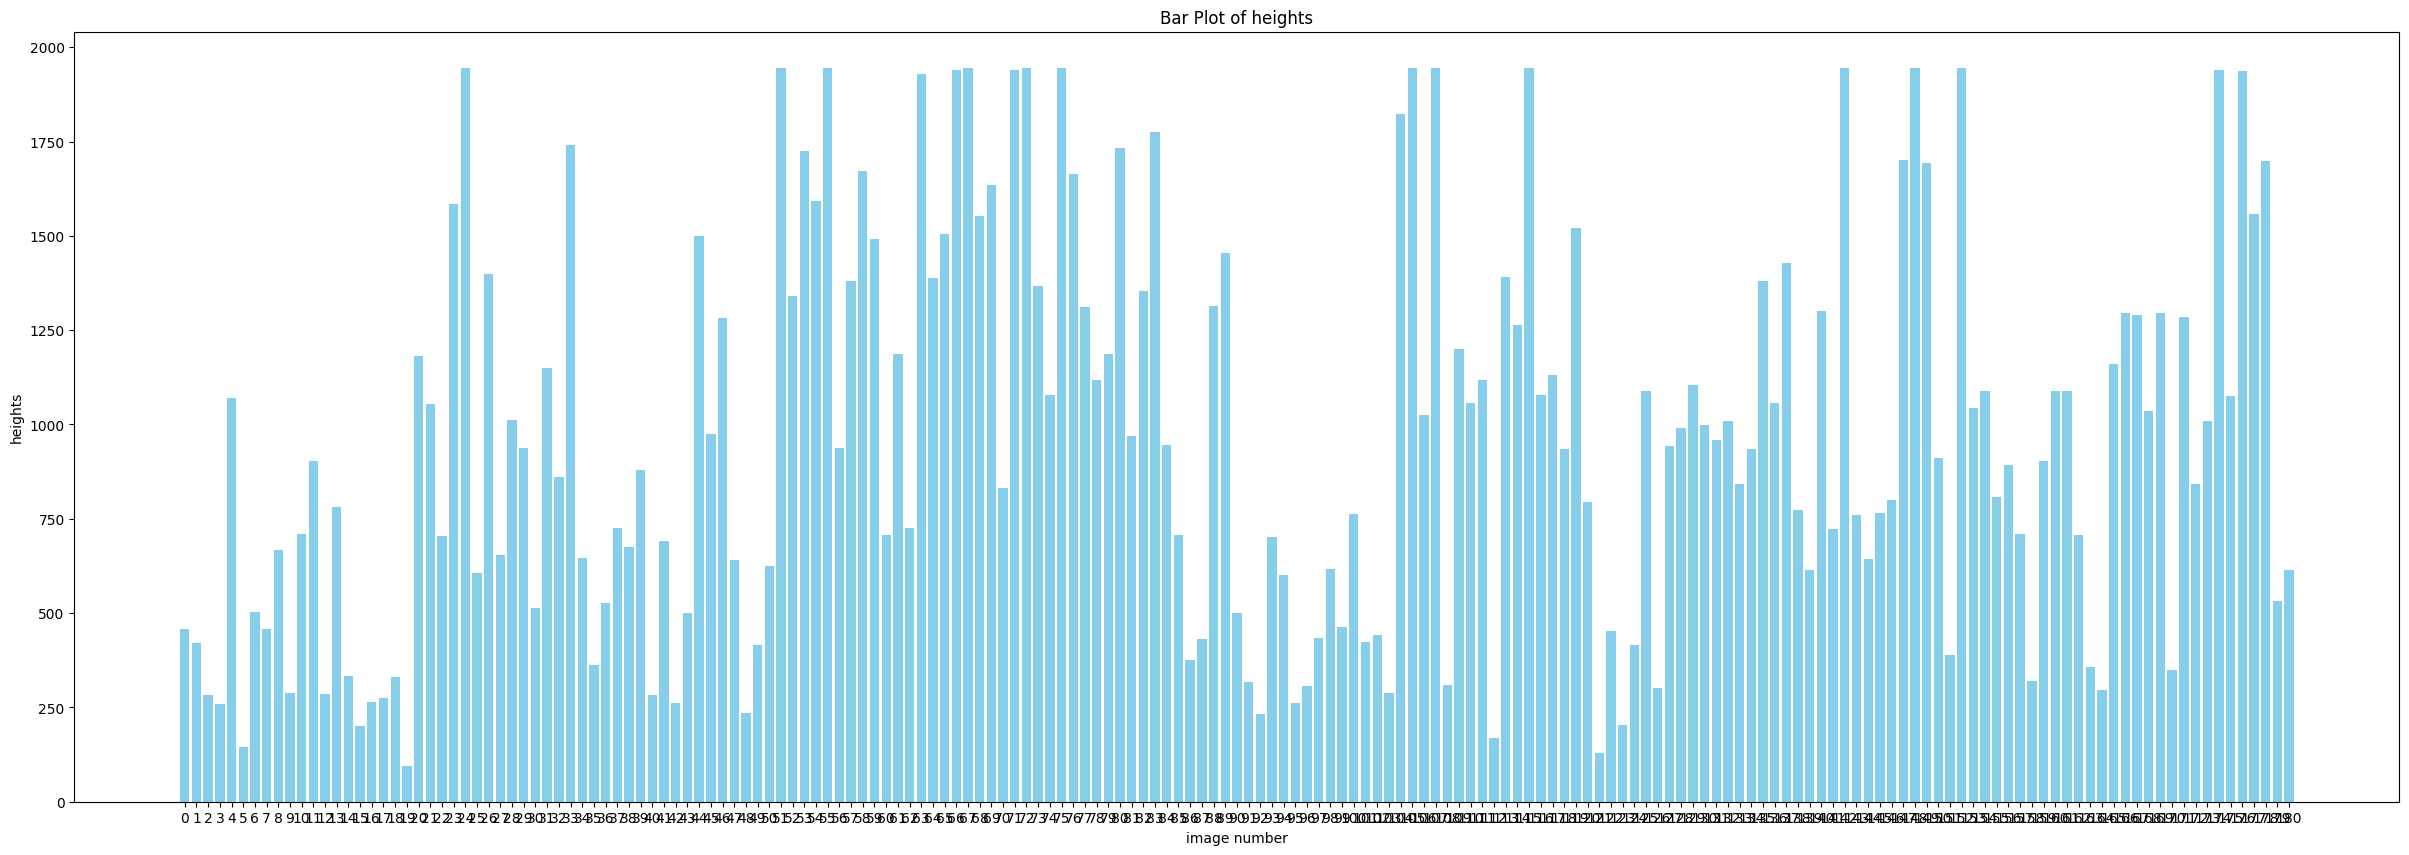

In [15]:
plt.figure(figsize=(30, 10))  # Imposta la dimensione della figura (larghezza, altezza)
plt.bar(images, heights, color='skyblue')
# Aggiungi titoli e label agli assi
plt.xlabel('image number')
plt.ylabel('heights')
plt.title('Bar Plot of heights')

# Mostra il plot
plt.show()

Crop and resize the images

In [16]:
%mkdir resized

In [17]:
def crop_center(image):
    width, height = image.size
    new_dim = min(width, height)
    left = (width - new_dim) / 2
    top = (height - new_dim) / 2
    right = (width + new_dim) / 2
    bottom = (height + new_dim) / 2
    return image.crop((left, top, right, bottom))

for i in images:
  img = Image.open(str(i))
  img = crop_center(img).resize((256, 256))
  img.save('resized/' + str(i) + '.png')

